# <font color='red'>Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Data to test

In [2]:
months = [8,12,14,20,21,26,27,32,40]
events = [1,1,1,0,1,0,1,0,0]

# <font color='purple'>Function for KM Survival Plot, Median Survival Time:

In [3]:
def km_plot(months,events):
    survival = [1]
    no_at_risk,no_of_deaths = risk(months,events)
    for i in range(1,len(months)):
        survival.append(survival[i-1]*((no_at_risk[i]-no_of_deaths[i])/no_at_risk[i]))
    plt.step(months, survival)
    plt.xlabel("Time(in months)")
    plt.ylabel("Survival Probability")
    plt.title("Kaplan Meier curve")
    
    median_survival = np.median(months)
    print("Median survival time:",median_survival)

In [4]:
def risk(months,events):
    no_at_risk = [len(months)]
    no_of_deaths = [0]
    censored = [0]
    for i in range(1,len(months)):
        if events[i]==1:
            no_of_deaths.append(1)
            censored.append(0)
        else:
            no_of_deaths.append(0)
            censored.append(1)
        no_at_risk.append(no_at_risk[i-1]-(no_of_deaths[i-1]+censored[i-1]))
    return no_at_risk,no_of_deaths
    

Median survival time: 21.0


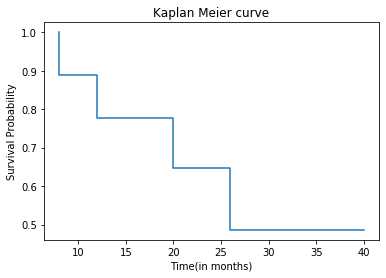

In [5]:
km_plot(months,events)

# <font color='purple'>Function to Perform Log-rank test

### Considering the following hypothesis:


### H0: Relapse-free time is identical between groups versus
### H1: Relapse-free time is not identical between groups (α=0.05)

### The test statistic for the log rank test is:


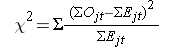

In [6]:
from IPython.display import Image
Image(filename='output.png')

In [7]:
def cal_modifiedrisk(months,original_risks1,months1,o1,months2,o2,original_risks2):
    g1_risks = [0]*len(months)
    g2_risks = [0]*len(months)
    for i in range(len(months)):
        if months[i] in months1:
            x = months1.index(months[i])
            o1[x]=1
            g1_risks[x]=original_risks1[x]
        else:
            p = np.asarray(months1)
            ind = months1.index(p[p>=months[i]])
            g1_risks[i]= original_risks1[ind]
        if months[i] in months2:
            y = months2.index(months[i])
            o2[y]=1
            g2_risks[y] = original_risks2[y]
    return g1_risks,g2_risks


In [8]:

def logrank(months1,events1,months2,events2):
    months = []
    g1_expected = []
    g2_expected = []
    for i in range(len(events1)):
        if(events1[i]==1):
            months.append(months1[i])
    for i in range(len(events2)):
        if(events2[i]==1):
            months.append(months2[i])
            
    months= set(months)
    months = list(months)
    o1= [0]*len(events1)
    o2= [0]* len(events2)
    o_tot = [0]*(max(len(o1),len(o2)))
    original_risks1, a= risk(months1,events1)
    original_risks2 ,a= risk(months2,events2)
    g1_risks,g2_risks = cal_modifiedrisk(months,original_risks1,months1,o1,months2,o2,original_risks2)
    risks_tot = [0]*max(len(g1_risks),len(g2_risks))
    for i in range(len(risks_tot)):
        risks_tot[i] = g1_risks[i]+g2_risks[i]
        o_tot[i] = o1[i]+o2[i]
    for i in range(len(months)):
        g1_expected.append((g1_risks[i]*(o_tot[i]/risks_tot[i])))
        g2_expected.append((g2_risks[i]*(o_tot[i]/risks_tot[i])))
    o1_total = sum(o1)
    o2_total = sum(o2)
    e1_total = sum(g1_expected)
    e2_total = sum(g2_expected)
    test_stat = (((o1_total-e1_total)**2)/e1_total) + (((o2_total-e2_total)**2)/e2_total)
    print("The test statistic value is ",test_stat)
    
    
    
    
            
        


### Sample Data to test 

In [9]:
logrank([8,9,10,12,23],[1,1,0,0,1],[7,9,12,14,16],[0,1,1,1,0])

The test statistic value is  0.023026315789473725


### The test statistic follows a chi-square distribution, and so we find the critical value in the table of critical values for the Χ2 distribution) for df=k-1 and α=0.05

### The rule is to reject H0 if Χ2 > Critical value

# <font color='red'>Question 2 

In [10]:
from scipy.stats import expon

In [11]:
d = np.linspace(0,3,101)
d1 = expon.pdf(d,0.01,0.3)
d2 = expon.pdf(d,0.01,0.4)
d = d[1:]
d1 = d1[1:][::-1]
d2 = d2[1:][::-1]

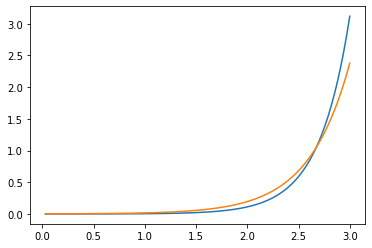

In [12]:
plt.plot(d,d1)
plt.plot(d,d2)

In [13]:
event_d1 = []
for i in range(len(d1)):
    if(np.random.randint(0,10)==1):
        event_d1.append(0)
    else:
        event_d1.append(1)

In [14]:
event_d2 = []
for i in range(len(d2)):
    if(np.random.randint(0,10)==1):
        event_d2.append(0)
    else:
        event_d2.append(1)

Median survival time: 0.022116211599808654
Median survival time: 0.05810484035372809


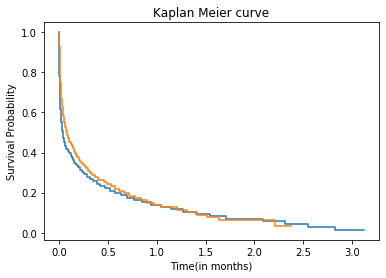

In [15]:
km_plot(d1,event_d1)
km_plot(d2,event_d2)